# IOT Demo Notebook
## Topics covered
1. Reading data physically from serial port 
2. Reading data via bluetooth
3. Using APIs for getting data via requests
4. Introduction to numpy 
    1. Numpy arrays basics
    2. Numpy Functions
    3. Coding perceptrons using numpy (***)
5. Introduction to pandas
    1. Reading xlsx , csv datafiles using pandas
    2. Slicing and indexing using pandas
    3. Processing data using pandas 
        1. Fining NaN datapoints
        2. Dropping Nan points
        3. Finding out statistical parameters of the dataset {mean , median , ...}
6. Introduction to matplotlib
   1. Plotting data using plot()
   2. Plotting data using scatter()
   3. Plotting data using hist()
   4. How to decide which plot function is needed ?
   5. Adding subplots and adjusting layouts
   6. Adding labels , title and grid
   
7. Introduction to regression and classification models on sklearn 
   1. What is regression ?
   2. Linear regression using sklearn
   3. Poly regression using sklearn
   4. Support Vector Regression using sklearn
   5. What is classification ?
   6. Suppot Vector Machine(linear and RBF kernel) for classification problems

### Importing the required libraries

In [314]:
import serial
import matplotlib.pyplot as plt
import requests 
import json
import pandas as pd
import numpy as np
import sklearn
import numpy
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

### Reading data from Serial Port

In [53]:
port = serial.Serial('COM6' , 9600)
port.readline().decode('utf-8')[:3]

### File for datalogging

In [87]:
log = open("data_det.csv" , "w")

### Getting data via requests

In [131]:
import requests

url = "https://weatherapi-com.p.rapidapi.com/forecast.json"

querystring = {"q":"Hyderabad , India","days":"1"}

headers = {
    'x-rapidapi-key': "7fb2932fe5mshe12358d87770314p1c4475jsn97d9bf9e7cb3",
    'x-rapidapi-host': "weatherapi-com.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

import json
data_weth = json.loads(response.content.decode('utf-8'))

### Creating the dataset

In [88]:
while True:
    data = port.readline().decode('utf-8')[:3]
    log.write(data)
    log.write(",")
    log.write(str(data_weth["current"]["temp_c"]))
    log.write(",")
    log.write((data_weth["current"]["wind_kph"]))
    log.write(",")
    log.write((data_weth["current"]["humidity"]))
    log.write(",")
    log.write((data_weth["current"]["condition"]["text"]) + "\r\n")   

KeyboardInterrupt: 

### Reading the data

In [132]:
dataset = pd.read_csv("data_det.csv")

In [115]:
dat = dataset.dropna() #Dropping NaN points

In [118]:
dat

,ecg,temp,wind,humd,cli
0,14.0,31.0,6.8,38.0,Sunny
1,143.0,31.0,6.8,38.0,Sunny
2,169.0,31.0,6.8,38.0,Sunny
3,146.0,31.0,6.8,38.0,Sunny
4,143.0,31.0,6.8,38.0,Sunny
...,...,...,...,...,...
10232,120.0,31.0,6.8,38.0,Sunny
10233,105.0,31.0,6.8,38.0,Sunny
10234,141.0,31.0,6.8,38.0,Sunny
10235,170.0,31.0,6.8,38.0,Sunny


In [117]:
dat.isna() #Checking for NaN points after transformation

,ecg,temp,wind,humd,cli
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
10232,False,False,False,False,False
10233,False,False,False,False,False
10234,False,False,False,False,False
10235,False,False,False,False,False


## Analysing data from a weather station

### Steps for making machine learning models:
1. Collect the data from source
2. Clean the data i.e
    1. Drop all NaN values as we cannot apply statistical models on Nan or missing data
    2. If the data values are too large look for transformations
    3. If needed apply normalization
4. Visualize the data and decide the type of problem i.e regression , classification , clustering , ...
5. Engineer the feature vectors
6. Identify the target vector
7. Decide the model to be used
8. Apply data pre-processing needed
9. Train the model
10. Look at evaluation parameters like confusion matrices or R2 scores
11. If the required performance is achieved export the model to your application and use the inference in the application

In [279]:
data = pd.read_csv("feed.csv")

In [280]:
new_dat = data.drop(columns=['created_at' , 'entry_id'])

Text(0.5, 1.0, 'Temperature plot')

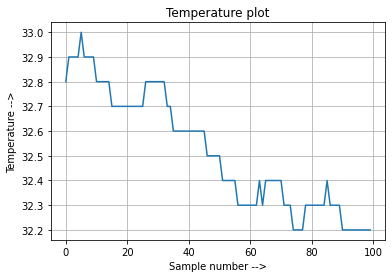

In [281]:
plt.plot(data["field1"])
plt.grid("on")
plt.xlabel("Sample number -->")
plt.ylabel("Temperature -->")
plt.title("Temperature plot")

Text(0.5, 1.0, 'Humidity plot')

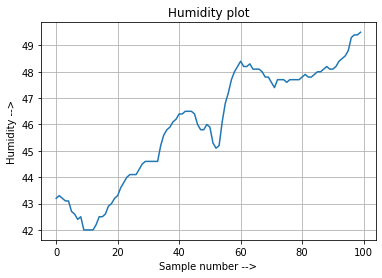

In [282]:
plt.plot(data["field2"])
plt.grid("on")
plt.xlabel("Sample number -->")
plt.ylabel("Humidity -->")
plt.title("Humidity plot")

In [302]:
target = []
for i in range(len(data["field1"])):
    if data["field1"][i] > 32.4:
        target.append("Hot")
    else:
        target.append("OK")
        
target1 = []
for i in range(len(data["field1"])):
    if data["field1"][i] > 32.4:
        target1.append(1)
    else:
        target1.append(0)

In [303]:
data["field1"]

0     32.8
1     32.9
2     32.9
3     32.9
4     32.9
      ... 
95    32.2
96    32.2
97    32.2
98    32.2
99    32.2
Name: field1, Length: 100, dtype: float64

In [288]:
data = data.drop(columns = ["created_at" , "entry_id"])

In [289]:
data

,field1,field2
0,32.8,43.2
1,32.9,43.3
2,32.9,43.2
3,32.9,43.1
4,32.9,43.1
...,...,...
95,32.2,48.8
96,32.2,49.3
97,32.2,49.4
98,32.2,49.4


In [304]:
data["Target"] = target

In [306]:
data

,field1,field2,Target
0,32.8,43.2,Hot
1,32.9,43.3,Hot
2,32.9,43.2,Hot
3,32.9,43.1,Hot
4,32.9,43.1,Hot
...,...,...,...
95,32.2,48.8,OK
96,32.2,49.3,OK
97,32.2,49.4,OK
98,32.2,49.4,OK


In [307]:
#Classification problem Hot or Normal ?
featurevector = np.concatenate((np.array(data["field1"]).reshape(-1,1) , np.array(data["field2"]).reshape(-1,1)) , axis = 1)

In [308]:
featurevector[:10]

array([[32.8, 43.2],
       [32.9, 43.3],
       [32.9, 43.2],
       [32.9, 43.1],
       [32.9, 43.1],
       [33. , 42.7],
       [32.9, 42.6],
       [32.9, 42.4],
       [32.9, 42.5],
       [32.9, 42. ]])

In [309]:
targetvector = np.array(data["Target"]).reshape(-1,1)

In [310]:
target1vector = np.array(target1).reshape(-1,1)

In [311]:
target1vector[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [320]:
t = targetvector.reshape(-1,1)
t.shape

(100, 1)

In [322]:
#Classifier
model = LogisticRegression()
model.fit(featurevector , target1vector)

c:\programdata\watsonstudiodesktop\miniconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [324]:
model.predict(np.array([32.8, 43.2]).reshape(1 , -1))

array([1])

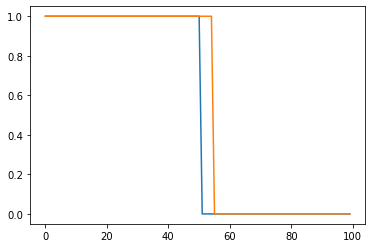

In [325]:
plt.plot(target1vector)
plt.plot(model.predict(featurevector))